In [1]:
!ln -s ./../lung_cancer_detection

ln: ./lung_cancer_detection: File exists


In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from lung_cancer_detection.utils import load_config

In [8]:
config_path = Path().absolute().parents[0] / "configs/baseline.yaml"
print(config_path)
config_path.exists()

/Users/felix/code/ml/lung-cancer-detection/configs/baseline.yaml


True

In [10]:
config = load_config(config_path)
config["data"]

{'raw_dir': '/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/LIDC-IDRI/',
 'data_dir': '/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/processed/segmentation/',
 'zip_dir': '/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/processed/segmentation_compressed/',
 'cache_dir': '/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/cache/',
 'sample_size': False,
 'batch_size': 32,
 'val_split': 0.2}

In [12]:
dp = Path(config["data"]["data_dir"])

In [14]:
df = pd.read_csv(dp / "meta/nodules.csv")
df.head()

,PatientID,StudyID,SeriesID,NoduleID,NumAnnotations,Diameter,SurfaceArea,Volume,Malignancy,Texture,...,Sphericity,Calcification,InternalStructure,Subtlety,x_start,x_stop,y_start,y_stop,z_start,z_stop
0,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,0,4,32.755812,2491.466573,6989.673615,5,5,...,4,6,1,5,340,392,297,341,86,95
1,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,0,2,30.781671,2807.198994,7244.667508,5,2,...,5,6,1,2,334,379,324,374,171,199
2,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,0,1,31.664468,1996.252117,4731.410934,2,1,...,5,6,1,1,331,367,350,384,62,70
3,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,1,4,31.001964,2225.677350,6519.463698,5,4,...,4,6,1,5,333,373,344,389,70,80
4,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,2,4,13.309155,321.183599,472.089669,4,5,...,4,6,1,4,192,205,299,318,81,85


In [18]:
print(f"Total number of nodules: {len(df)}")
print(f"Number of nodules at least three annotations: {len(df[df.NumAnnotations > 2])}")
print(f"Number of nodules at least two annotations: {len(df[df.NumAnnotations > 1])}")

Total number of nodules: 2625
Number of nodules at least three annotations: 1379
Number of nodules at least two annotations: 1861


In [22]:
xs = df.x_stop - df.x_start
ys = df.y_stop - df.y_start
zs = df.z_stop - df.z_start

In [23]:
max_x = xs.max()
max_y = ys.max()
max_z = zs.max()
print(max_x, max_y, max_z)

98 86 57


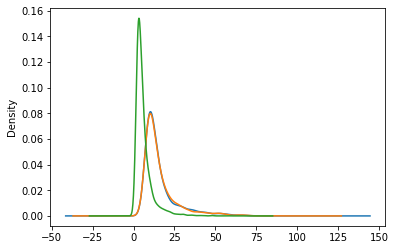

In [28]:
xs.plot(kind="density")
ys.plot(kind="density")
zs.plot(kind="density")
plt.show()

In [31]:
print(xs.describe())
print(ys.describe())
print(zs.describe())

count    2625.000000
mean       15.789714
std        10.487360
min         5.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        98.000000
dtype: float64
count    2625.000000
mean       15.790476
std        10.488902
min         4.000000
25%         9.000000
50%        12.000000
75%        18.000000
max        86.000000
dtype: float64
count    2625.000000
mean        5.977524
std         5.285798
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        57.000000
dtype: float64
